In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])



# Figure 1

In [20]:
M_norm_col_3 = pd.read_csv('./Mahalanobis-random_col-order-3-s-200-R-20-R_app-20-thresh-20.csv')
M_norm_col_4 =pd.read_csv('./Mahalanobis-random_col-order-4-s-53-R-20-R_app-20-thresh-20.csv')
M_norm_col_5 =pd.read_csv('./Mahalanobis-random_col-order-5-s-24-R-20-R_app-20-thresh-20.csv')

ALS_col_3= pd.read_csv('./CP-DT-random_col-s200-R20-R_app20-regu0.0-tlibnumpy.csv')
ALS_col_4 = pd.read_csv('./CP-DT-random_col-s53-R20-R_app20-regu0.0-tlibnumpy.csv')
ALS_col_5 =pd.read_csv('./CP-DT-random_col-s24-R20-R_app20-regu0.0-tlibnumpy.csv')

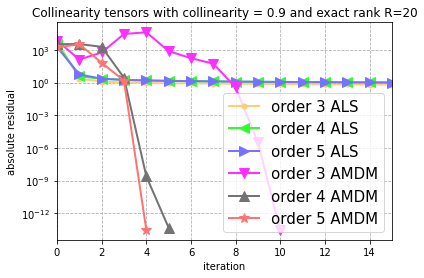

In [22]:
ax = ALS_col_3.plot(x='iterations', y='residual',marker='.',color=lighten_color('orange', 0.55),
                    linewidth=2,label='order 3 ALS',markersize=10)
ax = ALS_col_4.plot(x='iterations', y='residual',ax=ax,marker='<',color=lighten_color('g', 0.55),
                    linewidth=2,label='order 4 ALS',markersize=10)
ax = ALS_col_5.plot(x='iterations', y='residual',ax=ax,marker='>',color=lighten_color('b', 0.55),
                    linewidth=2,label='order 5 ALS',markersize=10)

ax= M_norm_col_3.plot(x='iterations' , y='residual',ax=ax, marker='v', color=lighten_color('purple', 0.55),
                      linewidth=2,label='order 3 AMDM',markersize=10)

ax= M_norm_col_4.plot(x='iterations' , y='residual',ax=ax, marker='^', color=lighten_color('black', 0.55),
                      linewidth=2,label='order 4 AMDM',markersize=10)

ax= M_norm_col_5.plot(x='iterations' , y='residual',ax=ax, marker='*', color=lighten_color('r', 0.55),
                      linewidth=2,label='order 5 AMDM',markersize=10)
#plt.ylim(bottom=0.15)
plt.xlim(left=0,right=15)
plt.yscale('log')
plt.grid(linestyle='--')
plt.legend( prop={'size': 15})
plt.title('Collinearity tensors with collinearity = 0.9 and exact rank R=20')
plt.xlabel('iteration')
plt.ylabel("absolute residual")
plt.savefig('./Coll_res_exact.pdf',bbox_inches='tight')
plt.show()




In [23]:
M_norm_rand_3 = pd.read_csv('./Mahalanobis-random-order-3-s-200-R-20-R_app-20-thresh-20.csv')
M_norm_rand_4 =pd.read_csv('./Mahalanobis-random-order-4-s-53-R-20-R_app-20-thresh-20.csv')
M_norm_rand_5 =pd.read_csv('./Mahalanobis-random-order-5-s-24-R-20-R_app-20-thresh-20.csv')

ALS_rand_3= pd.read_csv('./CP-DT-random-s200-R20-R_app20-regu0.0-tlibnumpy.csv')
ALS_rand_4 = pd.read_csv('./CP-DT-random-s53-R20-R_app20-regu0.0-tlibnumpy.csv')
ALS_rand_5 =pd.read_csv('./CP-DT-random-s24-R20-R_app20-regu0.0-tlibnumpy.csv')

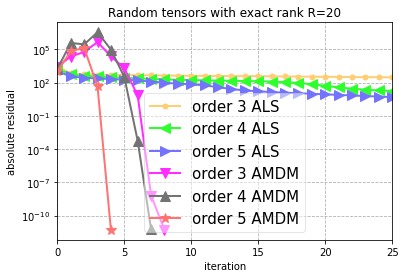

In [24]:
ax = ALS_rand_3.plot(x='iterations', y='residual',marker='.',color=lighten_color('orange', 0.55),
                    linewidth=2,label='order 3 ALS',markersize=10)
ax = ALS_rand_4.plot(x='iterations', y='residual',ax=ax,marker='<',color=lighten_color('g', 0.55),
                    linewidth=2,label='order 4 ALS',markersize=10)
ax = ALS_rand_5.plot(x='iterations', y='residual',ax=ax,marker='>',color=lighten_color('b', 0.55),
                    linewidth=2,label='order 5 ALS',markersize=10)

ax= M_norm_rand_3.plot(x='iterations' , y='residual',ax=ax, marker='v', color=lighten_color('purple', 0.55),
                      linewidth=2,label='order 3 AMDM',markersize=10)

ax= M_norm_rand_4.plot(x='iterations' , y='residual',ax=ax, marker='^', color=lighten_color('black', 0.55),
                      linewidth=2,label='order 4 AMDM',markersize=10)

ax= M_norm_rand_5.plot(x='iterations' , y='residual',ax=ax, marker='*', color=lighten_color('r', 0.55),
                      linewidth=2,label='order 5 AMDM',markersize=10)
#plt.ylim(bottom=0.15)
plt.xlim(left=0,right=25)
plt.yscale('log')
plt.grid(linestyle='--')
plt.legend( prop={'size': 15},fancybox=True, framealpha=0.5)
plt.title('Random tensors with exact rank R=20')
plt.xlabel('iteration')
plt.ylabel("absolute residual")
plt.savefig('./Rand_res_exact.pdf',bbox_inches='tight')
plt.show()





# FIGURE 2

In [36]:
ALS_random = pd.read_csv('./CP-DT-random-s100-R200-R_app200-regu0.0-tlibnumpy.csv')
Mnorm_random = pd.read_csv('./Mahalanobis-random-order-3-s-100-R-200-R_app-200-thresh-100.csv')

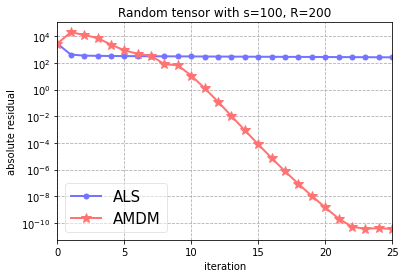

In [37]:
ax=ALS_random.plot(x='iterations', y='residual',marker='.',color=lighten_color('b', 0.55),
                    linewidth=2,label='ALS',markersize=10)

ax= Mnorm_random.plot(x='iterations' , y='residual',ax=ax, marker='*', color=lighten_color('r', 0.55),
                      linewidth=2,label='AMDM',markersize=10)
#plt.ylim(bottom=0.15)
plt.xlim(left=0,right=25)
plt.yscale('log')
plt.grid(linestyle='--')
plt.legend( prop={'size': 15},fancybox=True, framealpha=0.5)
plt.title('Random tensor with s=100, R=200')
plt.xlabel('iteration')
plt.ylabel("absolute residual")
plt.savefig('./random_large_rank.pdf',bbox_inches='tight')
plt.show()




# FIGURE 3

In [40]:
eps_perp = [3.16227766e-05, 3.20754560e-05, 3.25346155e-05, 3.30003479e-05,
       3.34727472e-05, 3.39519089e-05, 3.44379298e-05, 3.49309081e-05,
       3.54309434e-05, 3.59381366e-05]

conv1 = [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5],
        [5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0, 0, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 0],
        [5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 5, 0, 5, 5, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

conv2 = [[4, 3, 4, 2, 5, 5, 5, 2, 2, 4, 5, 2, 5, 4, 3, 5, 3, 3, 1, 5, 3, 3, 4, 3, 4, 3, 2, 5, 3, 3, 3, 3, 4, 2, 2, 0, 3, 4, 3, 4, 5, 1, 5, 5, 5, 3, 4, 3, 4, 5, 3, 2, 3, 4, 5, 5, 3, 4, 5, 5, 4, 5, 2, 4, 3, 3, 3, 4, 4, 3, 5, 4, 4, 4, 4, 4, 3, 5, 3, 3, 4, 4, 5, 4, 4, 3, 5, 4, 1, 1, 3, 3, 3, 4, 5, 3, 5, 3, 3, 3],
        [4, 1, 5, 4, 3, 5, 4, 4, 1, 2, 4, 4, 3, 4, 2, 4, 5, 4, 3, 2, 4, 5, 4, 4, 4, 4, 3, 4, 2, 3, 4, 5, 2, 3, 2, 3, 2, 3, 4, 4, 3, 2, 1, 3, 3, 3, 4, 0, 4, 4, 5, 2, 3, 2, 3, 4, 4, 5, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 5, 4, 2, 4, 4, 5, 3, 4, 4, 3, 4, 1, 3, 4, 4, 2, 3, 3, 5, 3, 3, 3, 4, 4, 5, 4, 3, 2, 1, 2, 4],
        [4, 4, 4, 3, 1, 4, 4, 4, 2, 5, 5, 4, 1, 3, 4, 2, 3, 2, 4, 4, 5, 1, 3, 5, 3, 4, 5, 5, 2, 4, 4, 3, 5, 4, 3, 4, 5, 4, 3, 2, 4, 5, 2, 4, 2, 2, 4, 4, 0, 2, 4, 3, 2, 5, 5, 2, 0, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 4, 3, 1, 2, 3, 2, 4, 4, 4, 4, 5, 4, 4, 4, 3, 1, 4, 3, 2, 2, 3, 4, 0, 4, 2, 3, 3, 5, 3, 4, 2],
        [5, 4, 2, 4, 0, 4, 1, 3, 3, 4, 3, 3, 2, 0, 4, 4, 4, 3, 4, 4, 5, 0, 4, 4, 3, 4, 0, 4, 3, 4, 3, 5, 3, 2, 2, 4, 4, 0, 3, 4, 4, 4, 3, 5, 4, 4, 3, 3, 3, 3, 0, 2, 2, 3, 2, 3, 0, 4, 4, 2, 0, 4, 4, 5, 4, 3, 3, 3, 3, 1, 4, 4, 4, 5, 5, 5, 0, 4, 5, 3, 4, 4, 4, 4, 4, 2, 3, 2, 0, 2, 5, 0, 2, 4, 5, 5, 4, 4, 2, 2],
        [3, 0, 0, 4, 4, 0, 0, 3, 3, 0, 4, 2, 0, 4, 3, 3, 3, 4, 4, 4, 4, 4, 2, 0, 5, 1, 3, 0, 4, 5, 0, 3, 2, 0, 0, 3, 0, 0, 3, 0, 4, 4, 4, 0, 2, 4, 5, 0, 4, 3, 3, 0, 3, 5, 0, 0, 2, 2, 4, 4, 0, 0, 3, 0, 4, 0, 0, 0, 0, 2, 4, 4, 3, 4, 4, 0, 3, 3, 2, 0, 2, 3, 3, 0, 0, 0, 4, 3, 0, 0, 4, 2, 0, 0, 2, 0, 3, 4, 0, 4],
        [0, 0, 0, 3, 0, 4, 0, 0, 2, 0, 0, 5, 0, 3, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 3, 0, 5, 2, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 3, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 3, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 4],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

new_conv = []
for c in conv1:
    new_c = []
    for c_i in c:
        if c_i>0:
            c_i = 1
        new_c.append(c_i)
    new_conv.append(new_c)
    
new_conv2 = []
for c in conv2:
    new_c = []
    for c_i in c:
        if c_i>0:
            c_i = 1
        new_c.append(c_i)
    new_conv2.append(new_c)

means1 = []
for c in new_conv:
    means1.append(np.mean(c))
means2 = []
for c in new_conv2:
    means2.append(np.mean(c))

/var/folders/hm/szf4244906q17lmg7grgy8rh0000gn/T/ipykernel_35572/483339543.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Probability_s100R100r50.pdf',bbox_to_inches='tight')


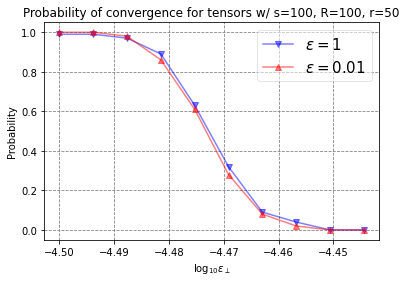

In [41]:
plt.plot(np.log10(eps_perp), means2, alpha=0.5, c= 'blue',label=r'$\epsilon = 1$',marker='v')
plt.plot(np.log10(eps_perp), means1,alpha=0.5, c= 'red',label=r'$\epsilon = 0.01$',marker='^')
#plt.plot(np.log10(eps_perp), means3, alpha=0.5, c= 'green',label=r'$\epsilon = 1$',marker='>')
plt.legend( prop={'size': 15},fancybox=True, framealpha=0.5)
plt.grid(linestyle='--',color ='gray')
plt.xlabel(r'$\log_{10}\epsilon_\perp$')
plt.ylabel('Probability')
plt.title('Probability of convergence for tensors w/ s=100, R=100, r=50')
plt.savefig('./Probability_s100R100r50.pdf',bbox_to_inches='tight')
plt.show()

In [43]:
eps_perp = [1.00000000e-05, 1.13646367e-05, 1.29154966e-05, 1.46779927e-05,
       1.66810054e-05, 1.89573565e-05, 2.15443469e-05, 2.44843675e-05,
       2.78255940e-05, 3.16227766e-05]

conv1 = [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0, 5, 5, 0, 5, 0, 5, 0, 5],
        [5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 5, 5, 0, 0, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0],
        [5, 5, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5],
        [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

conv2 = [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0],
        [2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


new_conv = []
for c in conv1:
    new_c = []
    for c_i in c:
        if c_i>0:
            c_i = 1
        new_c.append(c_i)
    new_conv.append(new_c)
new_conv2 = []
for c in conv2:
    new_c = []
    for c_i in c:
        if c_i>0:
            c_i = 1
        new_c.append(c_i)
    new_conv2.append(new_c)
    
    


/var/folders/hm/szf4244906q17lmg7grgy8rh0000gn/T/ipykernel_35572/974296183.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./Probability_s10R10r5.pdf',bbox_to_inches='tight')


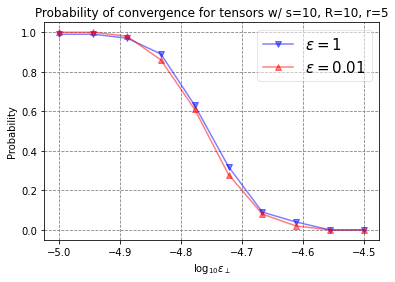

In [44]:
plt.plot(np.log10(eps_perp), means2, alpha=0.5, c= 'blue',label=r'$\epsilon = 1$',marker='v')
plt.plot(np.log10(eps_perp), means1,alpha=0.5, c= 'red',label=r'$\epsilon = 0.01$',marker='^')
#plt.plot(np.log10(eps_perp), means3, alpha=0.5, c= 'green',label=r'$\epsilon = 1$',marker='>')
plt.legend( prop={'size': 15},fancybox=True, framealpha=0.5)
plt.grid(linestyle='--',color ='gray')
plt.xlabel(r'$\log_{10}\epsilon_\perp$')
plt.ylabel('Probability')
plt.title('Probability of convergence for tensors w/ s=10, R=10, r=5')
plt.savefig('./Probability_s10R10r5.pdf',bbox_to_inches='tight')
plt.show()

# FIGURE 4

In [438]:
ALS = []
AMDM = []
Hybrid = []

for i in range(10):
    ALS.append(pd.read_csv('ALS-random_col100-R-10-R_app-10iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-random_col100-R-10-R_app-10iter'+str(i)+'.csv'))
    Hybrid.append(pd.read_csv('Hybrid-random_col100-R-10-R_app-10iter'+str(i)+'.csv'))

In [439]:
fitness_ALS = [ALS[i]['fitness'].values for i in range(10)]
cond_ALS = [ALS[i]['cond_num'].values for i in range(10)]

fitness_AMDM = [AMDM[i]['fitness'].values for i in range(10)]
cond_AMDM = [AMDM[i]['cond_num'].values for i in range(10)]

fitness_Hybrid = [Hybrid[i]['fitness'].values for i in range(10)]
cond_Hybrid = [Hybrid[i]['cond_num'].values for i in range(10)]

In [440]:
fit_means_ALS = []
fit_stds_ALS = []
cond_means_ALS = []
cond_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(200):
    arr1 = []
    arr2 = []
    for i in range(10):
        arr1.append(fitness_ALS[i][j])
        arr2.append(cond_ALS[i][j])
    fit_means_ALS.append(np.mean(arr1))
    fit_stds_ALS.append(np.std(arr1))
    cond_means_ALS.append(np.mean(arr2))
    cond_stds_ALS.append(np.std(arr2))
    min_ALS.append(np.min(arr2))
    max_ALS.append(np.max(arr2))

fit_means_ALS = np.array(fit_means_ALS)
fit_stds_ALS = np.array(fit_stds_ALS)
cond_means_ALS = np.array(cond_means_ALS)
cond_stds_ALS = np.array(cond_stds_ALS )
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)


In [441]:
fit_means_Hybrid = []
fit_stds_Hybrid = []
cond_means_Hybrid = []
cond_stds_Hybrid = []
min_Hybrid = []
max_Hybrid = []
for j in range(200):
    arr1 = []
    arr2 = []
    for i in range(10):
        arr1.append(fitness_Hybrid[i][j])
        arr2.append(cond_Hybrid[i][j])
    fit_means_Hybrid.append(np.mean(arr1))
    fit_stds_Hybrid.append(np.std(arr1))
    cond_means_Hybrid.append(np.mean(arr2))
    cond_stds_Hybrid.append(np.std(arr2))
    min_Hybrid.append(np.min(arr2))
    max_Hybrid.append(np.max(arr2))

fit_means_Hybrid = np.array(fit_means_Hybrid)
fit_stds_Hybrid = np.array(fit_stds_Hybrid)
cond_means_Hybrid = np.array(cond_means_Hybrid)
cond_stds_Hybrid = np.array(cond_stds_Hybrid)
min_Hybrid = np.array(min_Hybrid)
max_Hybrid = np.array(max_Hybrid)


In [442]:
fit_means_AMDM = []
fit_stds_AMDM = []
cond_means_AMDM = []
cond_stds_AMDM = []
min_AMDM = []
max_AMDM = []
for j in range(200):
    arr1 = []
    arr2 = []
    for i in range(10):
        arr1.append(fitness_AMDM[i][j])
        arr2.append(cond_AMDM[i][j])
    fit_means_AMDM.append(np.mean(arr1))
    fit_stds_AMDM.append(np.std(arr1))
    cond_means_AMDM.append(np.mean(arr2))
    cond_stds_AMDM.append(np.std(arr2))
    min_AMDM.append(np.min(arr2))
    max_AMDM.append(np.max(arr2))

fit_means_AMDM = np.array(fit_means_AMDM)
fit_stds_AMDM = np.array(fit_stds_AMDM)
cond_means_AMDM = np.array(cond_means_AMDM)
cond_stds_AMDM = np.array(cond_stds_AMDM )
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


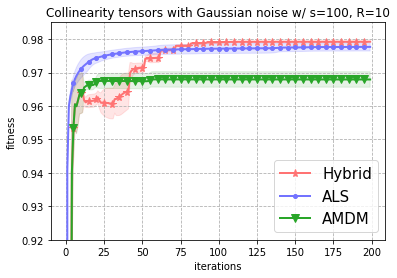

In [458]:
plt.plot(fit_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8,markevery=5)
plt.fill_between(np.arange(200),fit_means_Hybrid -fit_stds_Hybrid, fit_means_Hybrid +fit_stds_Hybrid, color='red', alpha=0.1)

plt.plot(fit_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markevery=5,markersize=8)
plt.fill_between(np.arange(200),fit_means_ALS -fit_stds_ALS, fit_means_ALS +fit_stds_ALS, color='blue', alpha=0.1)

plt.plot(fit_means_AMDM,marker='v',color=lighten_color('forestgreen', 0.9),linewidth=2,label='AMDM',markersize=8,markevery=5)
plt.fill_between(np.arange(200),fit_means_AMDM -fit_stds_AMDM, fit_means_AMDM +fit_stds_AMDM, color='green', alpha=0.1)

plt.ylim(bottom=0.92,top=0.985)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.grid(linestyle='--')
plt.legend( prop={'size': 15})
plt.title('Collinearity tensors with Gaussian noise w/ s=100, R=10')
plt.savefig('./Noisy_tensor_fitness.pdf',bbox_inches='tight')
plt.show()


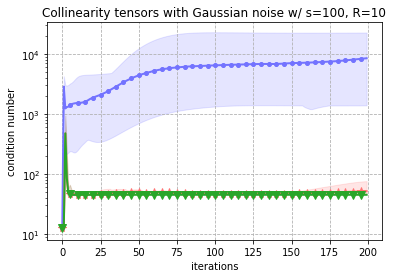

In [459]:
plt.plot(cond_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8,markevery=5)
plt.fill_between(np.arange(200),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(cond_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8,markevery=5)
plt.fill_between(np.arange(200),min_Hybrid, max_Hybrid, color='red', alpha=0.1)


plt.plot(cond_means_AMDM,marker='v',color=lighten_color('forestgreen', 0.9),linewidth=2,label='AMDM',markersize=8,markevery=5)
plt.fill_between(np.arange(200),min_AMDM , max_AMDM, color='green', alpha=0.1)

plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.grid(linestyle='--')
#plt.legend()
plt.title('Collinearity tensors with Gaussian noise w/ s=100, R=10')
plt.savefig('./Noisy_tensor_cond.pdf',bbox_inches='tight')
plt.show()

# FIGURE 5

In [45]:
ALS = []
AMDM = []
Hybrid = []
AMDM8 = []
for i in range(5):
    ALS.append(pd.read_csv('ALS-SLEEP100-R-10-R_app-10iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-SLEEP100-R-10-R_app-10iter'+str(i)+'.csv'))
    AMDM8.append(pd.read_csv('Mahalanobis-thresh-8SLEEP100-R-10-R_app-10iter'+str(i)+'.csv'))
    Hybrid.append(pd.read_csv('Hybrid-SLEEP100-R-10-R_app-10iter'+str(i)+'.csv'))

In [46]:
fitness_ALS = [ALS[i]['fitness'].values for i in range(5)]
fitness_AMDM = [AMDM[i]['fitness'].values for i in range(5)]
fitness_AMDM8 = [AMDM8[i]['fitness'].values for i in range(5)]
fitness_Hybrid = [Hybrid[i]['fitness'].values for i in range(5)]


In [47]:
cond_ALS = [ALS[i]['cond_num'].values for i in range(5)]
cond_AMDM = [AMDM[i]['cond_num'].values for i in range(5)]
cond_AMDM8 = [AMDM8[i]['cond_num'].values for i in range(5)]
cond_Hybrid = [Hybrid[i]['cond_num'].values for i in range(5)]


In [48]:
fit_means_ALS = []
fit_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_ALS[i][j])
    fit_means_ALS.append(np.mean(arr1))
    fit_stds_ALS.append(np.std(arr1))
    min_ALS.append(np.min(arr1))
    max_ALS.append(np.max(arr1))

fit_means_ALS = np.array(fit_means_ALS)
fit_stds_ALS = np.array(fit_stds_ALS)
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)


In [49]:
fit_means_AMDM = []
fit_stds_AMDM = []
min_AMDM = []
max_AMDM = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_AMDM[i][j])
    fit_means_AMDM.append(np.mean(arr1))
    fit_stds_AMDM.append(np.std(arr1))
    min_AMDM.append(np.min(arr1))
    max_AMDM.append(np.max(arr1))

fit_means_AMDM = np.array(fit_means_AMDM)
fit_stds_AMDM = np.array(fit_stds_AMDM)
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


In [50]:
fit_means_AMDM8 = []
fit_stds_AMDM8 = []
min_AMDM8 = []
max_AMDM8 = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_AMDM8[i][j])
    fit_means_AMDM8.append(np.mean(arr1))
    fit_stds_AMDM8.append(np.std(arr1))
    min_AMDM8.append(np.min(arr1))
    max_AMDM8.append(np.max(arr1))

fit_means_AMDM8 = np.array(fit_means_AMDM8)
fit_stds_AMDM8 = np.array(fit_stds_AMDM8)
min_AMDM8 = np.array(min_AMDM8)
max_AMDM8 = np.array(max_AMDM8)


In [51]:
fit_means_Hybrid = []
fit_stds_Hybrid = []
min_Hybrid = []
max_Hybrid = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_Hybrid[i][j])
    fit_means_Hybrid.append(np.mean(arr1))
    fit_stds_Hybrid.append(np.std(arr1))
    min_Hybrid.append(np.min(arr1))
    max_Hybrid.append(np.max(arr1))

fit_means_Hybrid = np.array(fit_means_Hybrid)
fit_stds_Hybrid = np.array(fit_stds_Hybrid)
min_Hybrid = np.array(min_Hybrid)
max_Hybrid = np.array(max_Hybrid)

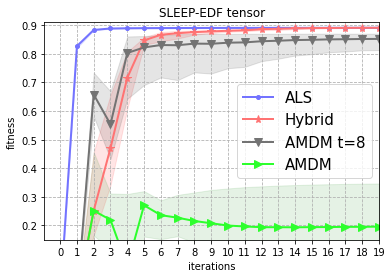

In [52]:
plt.plot(fit_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8)
plt.fill_between(np.arange(20),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(fit_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8)
plt.fill_between(np.arange(20),min_Hybrid, max_Hybrid, color='r', alpha=0.1)

plt.plot(fit_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=8',markersize=8)
plt.fill_between(np.arange(20),min_AMDM8, max_AMDM8, color='black', alpha=0.1)

plt.plot(fit_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8)
plt.fill_between(np.arange(20),min_AMDM, max_AMDM, color='g', alpha=0.1)

plt.ylim(bottom=0.15,top=0.91)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.grid(linestyle='--')
plt.xticks(range(0,20))
plt.xlim(right=19)
plt.legend( prop={'size': 15})
plt.title('SLEEP-EDF tensor')
plt.savefig('./sleep_tensor_fitness.pdf',bbox_inches='tight')
plt.show()


In [53]:
cond_means_ALS = []
cond_stds_ALS = []
cond_min_ALS = []
cond_max_ALS = []




for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_ALS[i][j])
    cond_means_ALS.append(np.mean(arr1))
    cond_stds_ALS.append(np.std(arr1))
    cond_min_ALS.append(np.min(arr1))
    cond_max_ALS.append(np.max(arr1))

cond_means_ALS = np.array(cond_means_ALS)
cond_stds_ALS = np.array(cond_stds_ALS)
cond_min_ALS = np.array(cond_min_ALS)
cond_max_ALS = np.array(cond_max_ALS)


In [54]:
cond_means_AMDM = []
cond_stds_AMDM = []
cond_min_AMDM = []
cond_max_AMDM = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_AMDM[i][j])
    cond_means_AMDM.append(np.mean(arr1))
    cond_stds_AMDM.append(np.std(arr1))
    cond_min_AMDM.append(np.min(arr1))
    cond_max_AMDM.append(np.max(arr1))

cond_means_AMDM = np.array(cond_means_AMDM)
cond_stds_AMDM = np.array(cond_stds_AMDM)
cond_min_AMDM = np.array(cond_min_AMDM)
cond_max_AMDM = np.array(cond_max_AMDM)


In [55]:
cond_means_AMDM8 = []
cond_stds_AMDM8 = []
cond_min_AMDM8 = []
cond_max_AMDM8 = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_AMDM8[i][j])
    cond_means_AMDM8.append(np.mean(arr1))
    cond_stds_AMDM8.append(np.std(arr1))
    cond_min_AMDM8.append(np.min(arr1))
    cond_max_AMDM8.append(np.max(arr1))

cond_means_AMDM8 = np.array(cond_means_AMDM8)
cond_stds_AMDM8 = np.array(cond_stds_AMDM8)
cond_min_AMDM8 = np.array(cond_min_AMDM8)
cond_max_AMDM8 = np.array(cond_max_AMDM8)


In [56]:
cond_means_Hybrid = []
cond_stds_Hybrid = []
cond_min_Hybrid = []
cond_max_Hybrid = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_Hybrid[i][j])
    cond_means_Hybrid.append(np.mean(arr1))
    cond_stds_Hybrid.append(np.std(arr1))
    cond_min_Hybrid.append(np.min(arr1))
    cond_max_Hybrid.append(np.max(arr1))

cond_means_Hybrid = np.array(cond_means_Hybrid)
cond_stds_Hybrid = np.array(cond_stds_Hybrid)
cond_min_Hybrid = np.array(cond_min_Hybrid)
cond_max_Hybrid = np.array(cond_max_Hybrid)


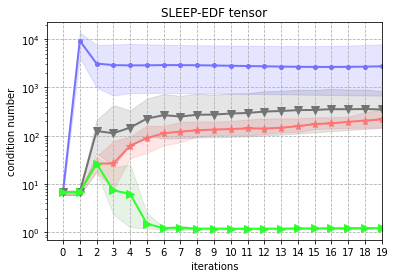

In [57]:
plt.plot(cond_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8)
plt.fill_between(np.arange(20),cond_min_ALS, cond_max_ALS, color='blue', alpha=0.1)

plt.plot(cond_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8)
plt.fill_between(np.arange(20),cond_min_Hybrid, cond_max_Hybrid, color='r', alpha=0.1)

plt.plot(cond_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=8',markersize=8)
plt.fill_between(np.arange(20),cond_min_AMDM8, cond_max_AMDM8, color='black', alpha=0.1)

plt.plot(cond_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8)
plt.fill_between(np.arange(20),cond_min_AMDM, cond_max_AMDM, color='g', alpha=0.1)

#plt.ylim(bottom=0.15,top=0.91)
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.yscale('log')
plt.grid(linestyle='--')
plt.xticks(range(0,20))
plt.xlim(right=19)
#plt.legend()
plt.title('SLEEP-EDF tensor')
plt.savefig('./sleep_tensor_cond.pdf',bbox_inches='tight')
plt.show()


# FIGURE 6

In [479]:
ALS = []
AMDM = []
Hybrid = []
AMDM8 = []
for i in range(5):
    ALS.append(pd.read_csv('ALS-MGH100-R-10-R_app-10iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-MGH100-R-10-R_app-10iter'+str(i)+'.csv'))
    AMDM8.append(pd.read_csv('Mahalanobis-thresh-8MGH100-R-10-R_app-10iter'+str(i)+'.csv'))
    Hybrid.append(pd.read_csv('Hybrid-MGH100-R-10-R_app-10iter'+str(i)+'.csv'))

In [480]:
fitness_ALS = [ALS[i]['fitness'].values for i in range(5)]
fitness_AMDM = [AMDM[i]['fitness'].values for i in range(5)]
fitness_AMDM8 = [AMDM8[i]['fitness'].values for i in range(5)]
fitness_Hybrid = [Hybrid[i]['fitness'].values for i in range(5)]


cond_ALS = [ALS[i]['cond_num'].values for i in range(5)]
cond_AMDM = [AMDM[i]['cond_num'].values for i in range(5)]
cond_AMDM8 = [AMDM8[i]['cond_num'].values for i in range(5)]
cond_Hybrid = [Hybrid[i]['cond_num'].values for i in range(5)]


In [481]:
fit_means_ALS = []
fit_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_ALS[i][j])
    fit_means_ALS.append(np.mean(arr1))
    fit_stds_ALS.append(np.std(arr1))
    min_ALS.append(np.min(arr1))
    max_ALS.append(np.max(arr1))

fit_means_ALS = np.array(fit_means_ALS)
fit_stds_ALS = np.array(fit_stds_ALS)
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)


In [482]:
fit_means_AMDM = []
fit_stds_AMDM = []
min_AMDM = []
max_AMDM = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_AMDM[i][j])
    fit_means_AMDM.append(np.mean(arr1))
    fit_stds_AMDM.append(np.std(arr1))
    min_AMDM.append(np.min(arr1))
    max_AMDM.append(np.max(arr1))

fit_means_AMDM = np.array(fit_means_AMDM)
fit_stds_AMDM = np.array(fit_stds_AMDM)
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


In [483]:
fit_means_AMDM8 = []
fit_stds_AMDM8 = []
min_AMDM8 = []
max_AMDM8 = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_AMDM8[i][j])
    fit_means_AMDM8.append(np.mean(arr1))
    fit_stds_AMDM8.append(np.std(arr1))
    min_AMDM8.append(np.min(arr1))
    max_AMDM8.append(np.max(arr1))

fit_means_AMDM8 = np.array(fit_means_AMDM8)
fit_stds_AMDM8 = np.array(fit_stds_AMDM8)
min_AMDM8 = np.array(min_AMDM8)
max_AMDM8 = np.array(max_AMDM8)


In [484]:
fit_means_Hybrid = []
fit_stds_Hybrid = []
min_Hybrid = []
max_Hybrid = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_Hybrid[i][j])
    fit_means_Hybrid.append(np.mean(arr1))
    fit_stds_Hybrid.append(np.std(arr1))
    min_Hybrid.append(np.min(arr1))
    max_Hybrid.append(np.max(arr1))

fit_means_Hybrid = np.array(fit_means_Hybrid)
fit_stds_Hybrid = np.array(fit_stds_Hybrid)
min_Hybrid = np.array(min_Hybrid)
max_Hybrid = np.array(max_Hybrid)

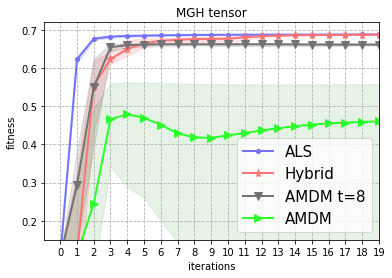

In [485]:
plt.plot(fit_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8)
plt.fill_between(np.arange(20),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(fit_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8)
plt.fill_between(np.arange(20),min_Hybrid, max_Hybrid, color='r', alpha=0.1)

plt.plot(fit_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=8',markersize=8)
plt.fill_between(np.arange(20),min_AMDM8, max_AMDM8, color='black', alpha=0.1)

plt.plot(fit_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8)
plt.fill_between(np.arange(20),min_AMDM, max_AMDM, color='g', alpha=0.1)

plt.ylim(bottom=0.15,top=0.72)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.grid(linestyle='--')
plt.xticks(range(0,20))
plt.xlim(right=19)
plt.legend( prop={'size': 15})
plt.title('MGH tensor')
plt.savefig('./MGH_tensor_fitness.pdf',bbox_inches='tight')
plt.show()


In [486]:
cond_means_ALS = []
cond_stds_ALS = []
cond_min_ALS = []
cond_max_ALS = []




for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_ALS[i][j])
    cond_means_ALS.append(np.mean(arr1))
    cond_stds_ALS.append(np.std(arr1))
    cond_min_ALS.append(np.min(arr1))
    cond_max_ALS.append(np.max(arr1))

cond_means_ALS = np.array(cond_means_ALS)
cond_stds_ALS = np.array(cond_stds_ALS)
cond_min_ALS = np.array(cond_min_ALS)
cond_max_ALS = np.array(cond_max_ALS)


In [487]:
cond_means_AMDM = []
cond_stds_AMDM = []
cond_min_AMDM = []
cond_max_AMDM = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_AMDM[i][j])
    cond_means_AMDM.append(np.mean(arr1))
    cond_stds_AMDM.append(np.std(arr1))
    cond_min_AMDM.append(np.min(arr1))
    cond_max_AMDM.append(np.max(arr1))

cond_means_AMDM = np.array(cond_means_AMDM)
cond_stds_AMDM = np.array(cond_stds_AMDM)
cond_min_AMDM = np.array(cond_min_AMDM)
cond_max_AMDM = np.array(cond_max_AMDM)


In [488]:
cond_means_AMDM8 = []
cond_stds_AMDM8 = []
cond_min_AMDM8 = []
cond_max_AMDM8 = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_AMDM8[i][j])
    cond_means_AMDM8.append(np.mean(arr1))
    cond_stds_AMDM8.append(np.std(arr1))
    cond_min_AMDM8.append(np.min(arr1))
    cond_max_AMDM8.append(np.max(arr1))

cond_means_AMDM8 = np.array(cond_means_AMDM8)
cond_stds_AMDM8 = np.array(cond_stds_AMDM8)
cond_min_AMDM8 = np.array(cond_min_AMDM8)
cond_max_AMDM8 = np.array(cond_max_AMDM8)


In [489]:
cond_means_Hybrid = []
cond_stds_Hybrid = []
cond_min_Hybrid = []
cond_max_Hybrid = []
for j in range(20):
    arr1 = []
    for i in range(5):
        arr1.append(cond_Hybrid[i][j])
    cond_means_Hybrid.append(np.mean(arr1))
    cond_stds_Hybrid.append(np.std(arr1))
    cond_min_Hybrid.append(np.min(arr1))
    cond_max_Hybrid.append(np.max(arr1))

cond_means_Hybrid = np.array(cond_means_Hybrid)
cond_stds_Hybrid = np.array(cond_stds_Hybrid)
cond_min_Hybrid = np.array(cond_min_Hybrid)
cond_max_Hybrid = np.array(cond_max_Hybrid)


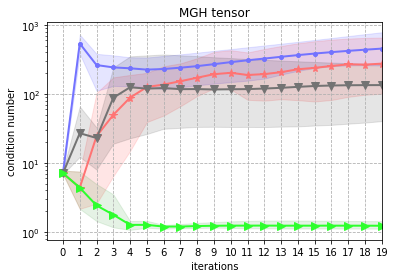

In [491]:
plt.plot(cond_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8)
plt.fill_between(np.arange(20),cond_min_ALS, cond_max_ALS, color='blue', alpha=0.1)

plt.plot(cond_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8)
plt.fill_between(np.arange(20),cond_min_Hybrid, cond_max_Hybrid, color='r', alpha=0.1)

plt.plot(cond_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=8',markersize=8)
plt.fill_between(np.arange(20),cond_min_AMDM8, cond_max_AMDM8, color='black', alpha=0.1)

plt.plot(cond_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8)
plt.fill_between(np.arange(20),cond_min_AMDM, cond_max_AMDM, color='g', alpha=0.1)

#plt.ylim(bottom=0.15,top=0.91)
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.yscale('log')
plt.grid(linestyle='--')
plt.xticks(range(0,20))
plt.xlim(right=19)
#plt.legend()
plt.title('MGH tensor')
plt.savefig('./MGH_tensor_cond.pdf',bbox_inches='tight')
plt.show()


# FIGURE 7

In [492]:
ALS = []
AMDM = []
Hybrid = []
AMDM8 = []
for i in range(10):
    ALS.append(pd.read_csv('ALS-amino100-R-3-R_app-3iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-amino100-R-3-R_app-3iter'+str(i)+'.csv'))
    AMDM8.append(pd.read_csv('Mahalanobis-thresh-2amino100-R-3-R_app-3iter'+str(i)+'.csv'))
    Hybrid.append(pd.read_csv('Hybrid-amino100-R-3-R_app-3iter'+str(i)+'.csv'))

In [493]:
fitness_ALS = [ALS[i]['fitness'].values for i in range(10)]
fitness_AMDM = [AMDM[i]['fitness'].values for i in range(10)]
fitness_AMDM8 = [AMDM8[i]['fitness'].values for i in range(10)]
fitness_Hybrid = [Hybrid[i]['fitness'].values for i in range(10)]


cond_ALS = [ALS[i]['cond_num'].values for i in range(10)]
cond_AMDM = [AMDM[i]['cond_num'].values for i in range(10)]
cond_AMDM8 = [AMDM8[i]['cond_num'].values for i in range(10)]
cond_Hybrid = [Hybrid[i]['cond_num'].values for i in range(10)]


In [494]:
fit_means_ALS = []
fit_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(fitness_ALS[i][j])
    fit_means_ALS.append(np.mean(arr1))
    fit_stds_ALS.append(np.std(arr1))
    min_ALS.append(np.min(arr1))
    max_ALS.append(np.max(arr1))

fit_means_ALS = np.array(fit_means_ALS)
fit_stds_ALS = np.array(fit_stds_ALS)
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)


In [495]:
fit_means_AMDM = []
fit_stds_AMDM = []
min_AMDM = []
max_AMDM = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(fitness_AMDM[i][j])
    fit_means_AMDM.append(np.mean(arr1))
    fit_stds_AMDM.append(np.std(arr1))
    min_AMDM.append(np.min(arr1))
    max_AMDM.append(np.max(arr1))

fit_means_AMDM = np.array(fit_means_AMDM)
fit_stds_AMDM = np.array(fit_stds_AMDM)
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


In [496]:
fit_means_AMDM8 = []
fit_stds_AMDM8 = []
min_AMDM8 = []
max_AMDM8 = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(fitness_AMDM8[i][j])
    fit_means_AMDM8.append(np.mean(arr1))
    fit_stds_AMDM8.append(np.std(arr1))
    min_AMDM8.append(np.min(arr1))
    max_AMDM8.append(np.max(arr1))

fit_means_AMDM8 = np.array(fit_means_AMDM8)
fit_stds_AMDM8 = np.array(fit_stds_AMDM8)
min_AMDM8 = np.array(min_AMDM8)
max_AMDM8 = np.array(max_AMDM8)


In [497]:
fit_means_Hybrid = []
fit_stds_Hybrid = []
min_Hybrid = []
max_Hybrid = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(fitness_Hybrid[i][j])
    fit_means_Hybrid.append(np.mean(arr1))
    fit_stds_Hybrid.append(np.std(arr1))
    min_Hybrid.append(np.min(arr1))
    max_Hybrid.append(np.max(arr1))

fit_means_Hybrid = np.array(fit_means_Hybrid)
fit_stds_Hybrid = np.array(fit_stds_Hybrid)
min_Hybrid = np.array(min_Hybrid)
max_Hybrid = np.array(max_Hybrid)

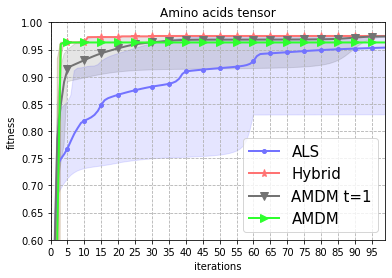

In [500]:
plt.plot(fit_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8,markevery=5)
plt.fill_between(np.arange(100),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(fit_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8,markevery=5)
plt.fill_between(np.arange(100),min_Hybrid, max_Hybrid, color='r', alpha=0.1)

plt.plot(fit_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=1',markersize=8,markevery=5)
plt.fill_between(np.arange(100),min_AMDM8, max_AMDM8, color='black', alpha=0.1)

plt.plot(fit_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8,markevery=5)
plt.fill_between(np.arange(100),min_AMDM, max_AMDM, color='g', alpha=0.1)

plt.ylim(bottom=0.6,top=1)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.grid(linestyle='--')
plt.xticks(range(0,100,5))
plt.xlim(left=0,right=99)
plt.legend( prop={'size': 15})
plt.title('Amino acids tensor')
plt.savefig('./amino_tensor_fitness.pdf',bbox_inches='tight')
plt.show()


In [501]:
cond_means_ALS = []
cond_stds_ALS = []
cond_min_ALS = []
cond_max_ALS = []




for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(cond_ALS[i][j])
    cond_means_ALS.append(np.mean(arr1))
    cond_stds_ALS.append(np.std(arr1))
    cond_min_ALS.append(np.min(arr1))
    cond_max_ALS.append(np.max(arr1))

cond_means_ALS = np.array(cond_means_ALS)
cond_stds_ALS = np.array(cond_stds_ALS)
cond_min_ALS = np.array(cond_min_ALS)
cond_max_ALS = np.array(cond_max_ALS)


In [502]:
cond_means_AMDM = []
cond_stds_AMDM = []
cond_min_AMDM = []
cond_max_AMDM = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(cond_AMDM[i][j])
    cond_means_AMDM.append(np.mean(arr1))
    cond_stds_AMDM.append(np.std(arr1))
    cond_min_AMDM.append(np.min(arr1))
    cond_max_AMDM.append(np.max(arr1))

cond_means_AMDM = np.array(cond_means_AMDM)
cond_stds_AMDM = np.array(cond_stds_AMDM)
cond_min_AMDM = np.array(cond_min_AMDM)
cond_max_AMDM = np.array(cond_max_AMDM)


In [503]:
cond_means_AMDM8 = []
cond_stds_AMDM8 = []
cond_min_AMDM8 = []
cond_max_AMDM8 = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(cond_AMDM8[i][j])
    cond_means_AMDM8.append(np.mean(arr1))
    cond_stds_AMDM8.append(np.std(arr1))
    cond_min_AMDM8.append(np.min(arr1))
    cond_max_AMDM8.append(np.max(arr1))

cond_means_AMDM8 = np.array(cond_means_AMDM8)
cond_stds_AMDM8 = np.array(cond_stds_AMDM8)
cond_min_AMDM8 = np.array(cond_min_AMDM8)
cond_max_AMDM8 = np.array(cond_max_AMDM8)


In [504]:
cond_means_Hybrid = []
cond_stds_Hybrid = []
cond_min_Hybrid = []
cond_max_Hybrid = []
for j in range(100):
    arr1 = []
    for i in range(10):
        arr1.append(cond_Hybrid[i][j])
    cond_means_Hybrid.append(np.mean(arr1))
    cond_stds_Hybrid.append(np.std(arr1))
    cond_min_Hybrid.append(np.min(arr1))
    cond_max_Hybrid.append(np.max(arr1))

cond_means_Hybrid = np.array(cond_means_Hybrid)
cond_stds_Hybrid = np.array(cond_stds_Hybrid)
cond_min_Hybrid = np.array(cond_min_Hybrid)
cond_max_Hybrid = np.array(cond_max_Hybrid)


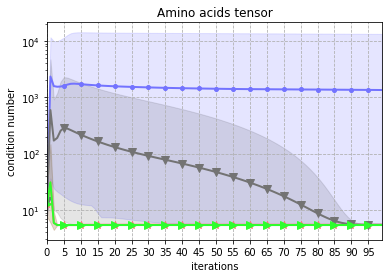

In [506]:
plt.plot(cond_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8,markevery=5)
plt.fill_between(np.arange(100),cond_min_ALS, cond_max_ALS, color='blue', alpha=0.1)

plt.plot(cond_means_Hybrid,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='Hybrid',markersize=8,markevery=5)
plt.fill_between(np.arange(100),cond_min_Hybrid, cond_max_Hybrid, color='r', alpha=0.1)

plt.plot(cond_means_AMDM8,marker='v',color=lighten_color('black', 0.55),linewidth=2,label='AMDM t=1',markersize=8,markevery=5)
plt.fill_between(np.arange(100),cond_min_AMDM8, cond_max_AMDM8, color='black', alpha=0.1)

plt.plot(cond_means_AMDM,marker='>',color=lighten_color('g', 0.55),linewidth=2,label='AMDM',markersize=8,markevery=5)
plt.fill_between(np.arange(100),cond_min_AMDM, cond_max_AMDM, color='g', alpha=0.1)

#plt.ylim(bottom=0.15,top=0.91)
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.yscale('log')
plt.grid(linestyle='--')
plt.xticks(range(0,100,5))
plt.xlim(left=0,right=99)
#plt.legend()
plt.title('Amino acids tensor')
plt.savefig('./amino_tensor_cond.pdf',bbox_inches='tight')
plt.show()


# FIGURE 8

In [507]:
ALS = []
AMDM = []
for i in range(5):
    ALS.append(pd.read_csv('ALS-scforder320-R-200-R_app-200iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-thresh-100scforder320-R-200-R_app-200iter'+str(i)+'.csv'))

In [508]:
fitness_ALS = [ALS[i]['fitness'].values for i in range(5)]
fitness_AMDM = [AMDM[i]['fitness'].values for i in range(5)]



In [509]:
fit_means_ALS = []
fit_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(200):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_ALS[i][j])
    fit_means_ALS.append(np.mean(arr1))
    fit_stds_ALS.append(np.std(arr1))
    min_ALS.append(np.min(arr1))
    max_ALS.append(np.max(arr1))

fit_means_ALS = np.array(fit_means_ALS)
fit_stds_ALS = np.array(fit_stds_ALS)
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)


In [510]:
fit_means_AMDM = []
fit_stds_AMDM = []
min_AMDM = []
max_AMDM = []
for j in range(200):
    arr1 = []
    for i in range(5):
        arr1.append(fitness_AMDM[i][j])
    fit_means_AMDM.append(np.mean(arr1))
    fit_stds_AMDM.append(np.std(arr1))
    min_AMDM.append(np.min(arr1))
    max_AMDM.append(np.max(arr1))

fit_means_AMDM = np.array(fit_means_AMDM)
fit_stds_AMDM = np.array(fit_stds_AMDM)
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


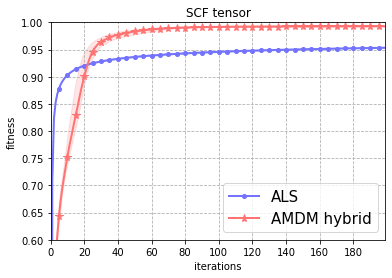

In [512]:
plt.plot(fit_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=8,markevery=5)
plt.fill_between(np.arange(200),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(fit_means_AMDM,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='AMDM hybrid',markersize=8,markevery=5)
plt.fill_between(np.arange(200),min_AMDM, max_AMDM, color='r', alpha=0.1)

plt.ylim(bottom=0.6,top=1)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.grid(linestyle='--')
plt.xticks(range(0,200,20))
plt.xlim(left=0,right=199)
plt.legend( prop={'size': 15})
plt.title('SCF tensor')
plt.savefig('./scf_tensor_fitness.pdf',bbox_inches='tight')
plt.show()


In [427]:
ALS3 = []
AMDM3 = []

ALS4 = []
AMDM4 = []

ALS5 = []
AMDM5 = []

for i in range(10):
    ALS3.append(pd.read_csv('ALS-random100-R-20-R_app-20iter'+str(i)+'.csv'))
    AMDM3.append(pd.read_csv('Mahalanobis-thresh-100random100-R-20-R_app-20iter'+str(i)+'.csv'))
    ALS4.append(pd.read_csv('ALS-randomorder432-R-20-R_app-20iter'+str(i)+'.csv'))
    AMDM4.append(pd.read_csv('Mahalanobis-thresh-100randomorder432-R-20-R_app-20iter'+str(i)+'.csv'))
    ALS5.append(pd.read_csv('ALS-randomorder520-R-20-R_app-20iter'+str(i)+'.csv'))
    AMDM5.append(pd.read_csv('Mahalanobis-thresh-100randomorder520-R-20-R_app-20iter'+str(i)+'.csv'))

In [428]:
fitness_ALS3 = [ALS3[i]['residual'].values for i in range(10)]
fitness_ALS4 = [ALS4[i]['residual'].values for i in range(10)]
fitness_ALS5 = [ALS5[i]['residual'].values for i in range(10)]


fitness_AMDM3 = [AMDM3[i]['residual'].values for i in range(10)]
fitness_AMDM4 = [AMDM4[i]['residual'].values for i in range(10)]
fitness_AMDM5 = [AMDM5[i]['residual'].values for i in range(10)]


In [429]:
lens1als = [len(ALS3[i]) for i in range(10)]
lens2als = [len(ALS4[i]) for i in range(10)]
lens3als = [len(ALS5[i]) for i in range(10)]

In [430]:
fit_means_ALS3 = []
fit_stds_ALS3 = []
fit_means_ALS4 = []
fit_stds_ALS4 = []
fit_means_ALS5 = []
fit_stds_ALS5 = []



min_ALS3 = []
max_ALS3 = []
min_ALS4 = []
max_ALS4 = []
min_ALS5 = []
max_ALS5 = []





for j in range(max(lens1als)):
    arr1 = []
    
    for i in range(10):
        arr1.append(fitness_ALS3[i][j])
        
    fit_means_ALS3.append(np.mean(arr1))
    fit_stds_ALS3.append(np.std(arr1))
    
    min_ALS3.append(np.min(arr1))
    max_ALS3.append(np.max(arr1))
    
for j in range(max(lens2als)):
    arr2 = []
    for i in range(10):
        if j<len(fitness_ALS4[i]):
            arr2.append(fitness_ALS4[i][j])
        else:
            arr2.append(fitness_ALS4[i][-1])
        
    fit_means_ALS4.append(np.mean(arr2))
    fit_stds_ALS4.append(np.std(arr2))
    
    min_ALS4.append(np.min(arr2))
    max_ALS4.append(np.max(arr2))
    
for j in range(max(lens3als)):
    arr3 = []
    for i in range(10):
        if j<len(fitness_ALS5[i]):
            arr3.append(fitness_ALS5[i][j])
        else:
            arr3.append(fitness_ALS5[i][-1])
    
    fit_means_ALS5.append(np.mean(arr3))
    fit_stds_ALS5.append(np.std(arr3))

    min_ALS5.append(np.min(arr3))
    max_ALS5.append(np.max(arr3))

fit_means_ALS3 = np.array(fit_means_ALS3)
fit_stds_ALS3 = np.array(fit_stds_ALS3)
min_ALS3 = np.array(min_ALS3)
max_ALS3 = np.array(max_ALS3)

fit_means_ALS4 = np.array(fit_means_ALS4)
fit_stds_ALS4 = np.array(fit_stds_ALS4)
min_ALS4 = np.array(min_ALS4)
max_ALS4 = np.array(max_ALS4)

fit_means_ALS5 = np.array(fit_means_ALS5)
fit_stds_ALS5 = np.array(fit_stds_ALS5)
min_ALS5 = np.array(min_ALS5)
max_ALS5 = np.array(max_ALS5)


In [431]:
lens1 = [len(AMDM3[i]) for i in range(10)]
lens2 = [len(AMDM4[i]) for i in range(10)]
lens3 = [len(AMDM5[i]) for i in range(10)]

In [432]:
fit_means_AMDM3 = []
fit_stds_AMDM3 = []
fit_means_AMDM4 = []
fit_stds_AMDM4 = []
fit_means_AMDM5 = []
fit_stds_AMDM5 = []



min_AMDM3 = []
max_AMDM3 = []
min_AMDM4 = []
max_AMDM4 = []
min_AMDM5 = []
max_AMDM5 = []



for j in range(max(lens1)):
    arr1 = []
    
    for i in range(10):
        if j<len(fitness_AMDM3[i]):
            arr1.append(fitness_AMDM3[i][j])
        else:
            arr1.append(fitness_AMDM3[i][-1])
        
    fit_means_AMDM3.append(np.mean(arr1))
    fit_stds_AMDM3.append(np.std(arr1))
    
    min_AMDM3.append(np.min(arr1))
    max_AMDM3.append(np.max(arr1))
    
for j in range(max(lens2)):
    arr2 = []
    for i in range(10):
        if j<len(fitness_AMDM4[i]):
            arr2.append(fitness_AMDM4[i][j])
        else:
            arr2.append(fitness_AMDM4[i][-1])
        
    fit_means_AMDM4.append(np.mean(arr2))
    fit_stds_AMDM4.append(np.std(arr2))
    
    min_AMDM4.append(np.min(arr2))
    max_AMDM4.append(np.max(arr2))
    
for j in range(max(lens3)):
    arr3 = []
    for i in range(10):
        if j<len(fitness_AMDM5[i]):
            arr3.append(fitness_AMDM5[i][j])
        else:
            arr3.append(fitness_AMDM5[i][-1])
    
    fit_means_AMDM5.append(np.mean(arr3))
    fit_stds_AMDM5.append(np.std(arr3))

    min_AMDM5.append(np.min(arr3))
    max_AMDM5.append(np.max(arr3))



fit_means_AMDM3 = np.array(fit_means_AMDM3)
fit_stds_AMDM3 = np.array(fit_stds_AMDM3)
min_AMDM3 = np.array(min_AMDM3)
max_AMDM3 = np.array(max_AMDM3)

fit_means_AMDM4 = np.array(fit_means_AMDM4)
fit_stds_AMDM4 = np.array(fit_stds_AMDM4)
min_AMDM4 = np.array(min_AMDM4)
max_AMDM4 = np.array(max_AMDM4)

fit_means_AMDM5 = np.array(fit_means_AMDM5)
fit_stds_AMDM5 = np.array(fit_stds_AMDM5)
min_AMDM5 = np.array(min_AMDM5)
max_AMDM5 = np.array(max_AMDM5)


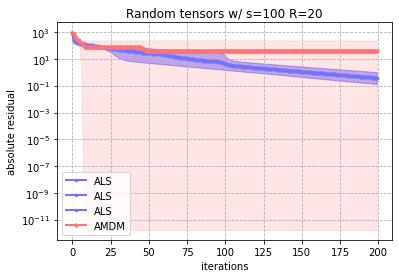

In [433]:
plt.plot(fit_means_ALS3,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=5)
plt.fill_between(np.arange(max(lens1als)),min_ALS3, max_ALS3, color='blue', alpha=0.1)

plt.plot(fit_means_ALS3,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=5)
plt.fill_between(np.arange(max(lens1als)),min_ALS3, max_ALS3, color='blue', alpha=0.1)

plt.plot(fit_means_ALS3,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=5)
plt.fill_between(np.arange(max(lens1als)),min_ALS3, max_ALS3, color='blue', alpha=0.1)

plt.plot(fit_means_AMDM3,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='AMDM',markersize=5)
plt.fill_between(np.arange(max(lens1)),min_AMDM3, max_AMDM3, color='r', alpha=0.1)


plt.xlabel('iterations')
plt.ylabel('absolute residual')
plt.grid(linestyle='--')
plt.yscale('log')
#plt.xlim(right=19)
plt.legend()
plt.title('Random tensors w/ s=100 R=20')
plt.savefig('./Random_convergence.pdf',bbox_inches='tight')
plt.show()


In [60]:
ALS = []
AMDM = []

for i in range(5):
    ALS.append(pd.read_csv('ALS-random100-R-200-R_app-200iter'+str(i)+'.csv'))
    AMDM.append(pd.read_csv('Mahalanobis-random100-R-200-R_app-200iter'+str(i)+'.csv'))

residual_ALS = [ALS[i]['residual'].values for i in range(5)]
residual_AMDM = [AMDM[i]['residual'].values for i in range(5)]

res_means_ALS = []
res_stds_ALS = []
min_ALS = []
max_ALS = []




for j in range(100):
    arr1 = []
    for i in range(5):
        arr1.append(residual_ALS[i][j])
    res_means_ALS.append(np.mean(arr1))
    res_stds_ALS.append(np.std(arr1))
    min_ALS.append(np.min(arr1))
    max_ALS.append(np.max(arr1))

res_means_ALS = np.array(res_means_ALS)
res_stds_ALS = np.array(res_stds_ALS)
min_ALS = np.array(min_ALS)
max_ALS = np.array(max_ALS)

lens = [len(AMDM[i]) for i in range(5)]

res_means_AMDM = []
res_stds_AMDM = []
min_AMDM = []
max_AMDM = []




for j in range(max(lens)):
    arr1 = []
    for i in range(5):
        if j<len(residual_AMDM[i]):
            arr1.append(residual_AMDM[i][j])
        else:
            arr1.append(residual_AMDM[i][-1])
    res_means_AMDM.append(np.mean(arr1))
    res_stds_AMDM.append(np.std(arr1))
    min_AMDM.append(np.min(arr1))
    max_AMDM.append(np.max(arr1))

res_means_AMDM = np.array(res_means_AMDM)
res_stds_AMDM = np.array(res_stds_AMDM)
min_AMDM = np.array(min_AMDM)
max_AMDM = np.array(max_AMDM)


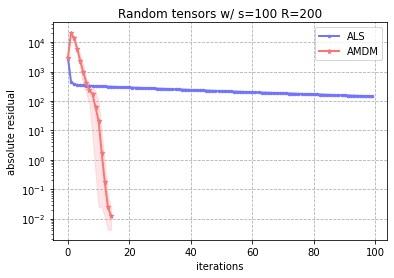

In [61]:
plt.plot(res_means_ALS,marker='.',color=lighten_color('b', 0.55),linewidth=2,label='ALS',markersize=5)
plt.fill_between(np.arange(100),min_ALS, max_ALS, color='blue', alpha=0.1)

plt.plot(res_means_AMDM,marker='*',color=lighten_color('r', 0.55),linewidth=2,label='AMDM',markersize=5)
plt.fill_between(np.arange(15),min_AMDM, max_AMDM, color='r', alpha=0.1)


plt.xlabel('iterations')
plt.ylabel('absolute residual')
plt.grid(linestyle='--')
plt.yscale('log')
#plt.xlim(right=19)
plt.legend()
plt.title('Random tensors w/ s=100 R=200')
plt.savefig('./Random_large_rank.pdf',bbox_inches='tight')
plt.show()
